## Proyecto 3.1 Sistema lógica difusa

In [26]:
# Import the necessary packages
import numpy as np
import skfuzzy as sk
from skfuzzy import control as ctrl

# For plot membership functions
import warnings
warnings.filterwarnings("ignore")

Se definen las variables de entrada y salida del sistema difuso.

In [27]:
# Definition input variables

# --/ facilities quality /--
# 1.0 - 10.0

facilities_range = np.arange(1, 10.1, 0.1)
facilities = ctrl.Antecedent(facilities_range, "facilities")

# --/ staff attentions /--
# 1.0 - 10.0

staff_range = np.arange(1, 10.1, 0.1)
staff = ctrl.Antecedent(staff_range, "staff")

# --/ price /--
# $0.00 - $15,000.00

price_range = np.arange(0, 15001, 0.01)
price = ctrl.Antecedent(price_range, "price")


# Definition output variables

# --/ hotel rating /--
# 1.0 - 10.0

rating_range = np.arange(1, 10.1, 0.1)
rating = ctrl.Consequent(rating_range, "rating")

Se definen las funciones de membresía de cada variable (entrada y salida).

In [28]:
# Definition membership functions

# --/ facilities quality /--
# Careless, Care, Excellent

facilities["careless"] = sk.trapmf(facilities.universe, [0, 0, 3, 4])
facilities["care"] = sk.trapmf(facilities.universe, [3.5, 5, 7, 8])
facilities["excellent"] = sk.trapmf(facilities.universe, [6, 8.5, 10.1, 10.1])

# --/ staff attentions /--
# Poor, Fair, Good, Excellent

staff["poor"] = sk.trapmf(staff.universe, [0, 0, 2, 4])
staff["fair"] = sk.trapmf(staff.universe, [3, 5, 6.5, 8])
staff["good"] = sk.trapmf(staff.universe, [6, 7, 8.5, 10])
staff["excellent"] = sk.trapmf(staff.universe, [8, 9, 10, 10.1])

# --/ price /--
# Cheap, Regular, Expensive

price["cheap"] = sk.trapmf(price.universe, [0, 0, 500, 700])
price["regular"] = sk.trapmf(price.universe, [450, 700, 1500, 1850])
price["expensive"] = sk.trapmf(price.universe, [1600, 2000, 15000, 15001])


# Definition output membership functions

# --/ hotel rating /--
# Very Poor, Poor, Fair, Good, Excellent

rating["very poor"] = sk.trapmf(rating.universe, [0, 0, 3, 3.5])
rating["poor"] = sk.trapmf(rating.universe, [1.5, 3.5, 5, 5.5])
rating["fair"] = sk.trapmf(rating.universe, [4, 5.5, 7, 7.5])
rating["good"] = sk.trapmf(rating.universe, [5.5, 7.5, 9, 10])
rating["excellent"] = sk.trapmf(rating.universe, [9, 9.5, 10, 10.1])

Se muestran las gráficas de las funciones de membresía.

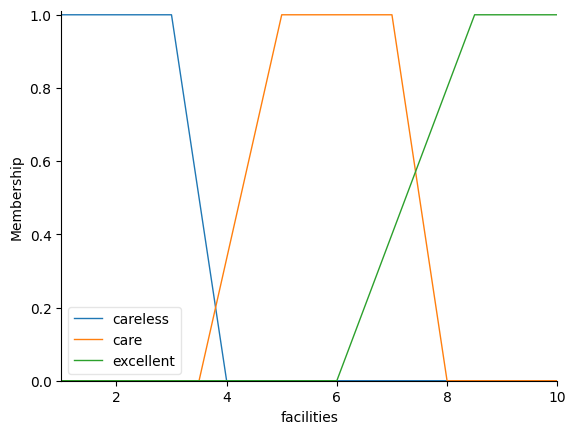

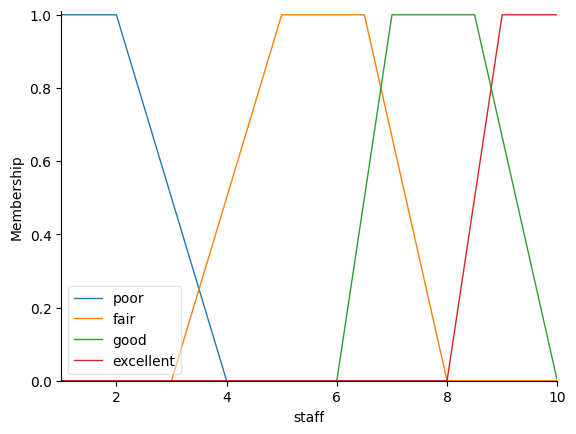

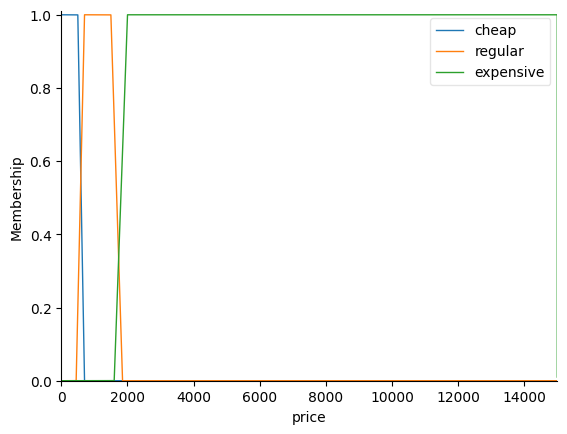

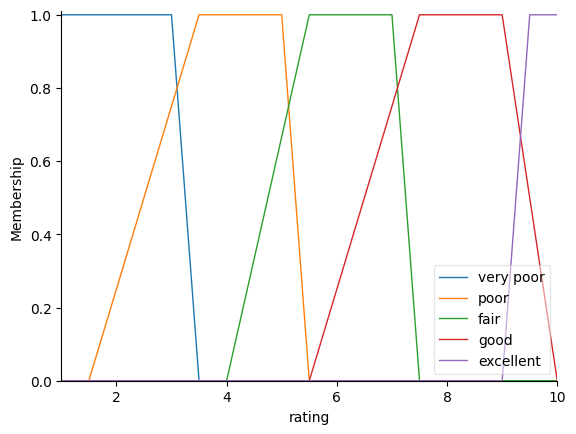

In [29]:
facilities.view()
staff.view()
price.view()
rating.view()

Se definen las reglas del sistema difuso.

In [30]:
# Definition rules

# --/ rules /--

# Rule 1:
# if 'facilities' is 'careless' and 'staff' is 'poor' and 'price' is 'expensive'
# then 'rating' is 'very poor'

rule1 = ctrl.Rule(
    facilities["careless"] & staff["poor"] & price["expensive"], rating["very poor"]
)

# Rule 2:
# if 'facilities' is 'careless' and 'price' is 'regular'
# then 'rating' is 'poor'

rule2 = ctrl.Rule(facilities["careless"] & price["regular"], rating["poor"])

# Rule 3:
# if 'facilities' is 'careless' and 'staff' is 'fair' or 'good' and 'price' is 'regular'
# then 'rating' is 'fair'

rule3 = ctrl.Rule(
    facilities["careless"] & (staff["fair"] | staff["good"]) & price["regular"],
    rating["fair"],
)

# Rule 4:
# if 'staff' is 'excellent' and 'price' is 'cheap'
# then 'rating' is 'good'

rule4 = ctrl.Rule(staff["excellent"] & price["cheap"], rating["good"])

# Rule 5:
# if 'facilities' is 'excellent' and 'staff' is 'excellent' and 'price' is 'cheap' or 'regular'
# then 'rating' is 'excellent'

rule5 = ctrl.Rule(
    facilities["excellent"] & staff["excellent"] & (price["cheap"] | price["regular"]),
    rating["excellent"],
)

Ahora, se crea el sistema difuso a partir de las reglas previamente definidas y se crea el simulador del sistema difuso.

In [31]:
# Definition of control system
rating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

# Create control system simulation
rating_hotel = ctrl.ControlSystemSimulation(rating_ctrl)

### Pruebas del sistema difuso

Prueba 1:

- Calidad de las instalaciones: 2.5 / 10
- Atención del personal: 8.5 / 10
- Precio: $1200.00

Hotel rating: 4.8 / 10.0


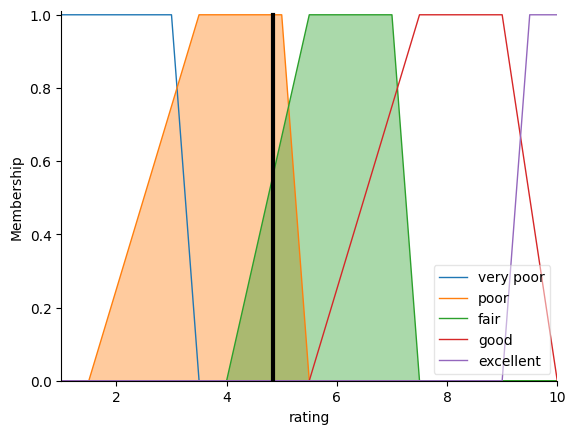

In [33]:
rating_hotel.input["facilities"] = 2.5
rating_hotel.input["staff"] = 8.5
rating_hotel.input["price"] = 1200.0

# Calculate
rating_hotel.compute()

# Show results
print(f'Hotel rating: {rating_hotel.output["rating"]:.1f} / 10.0')

rating.view(sim=rating_hotel)